## TF Lite Breast Cancer Detection Week 3: Exploratory Data Analysis
### Yinda Chen and Alice Tang

This week's notebook will expand upon last week's EDA, as we did most of it last week for the other datasets. Except, this time we're going to be exploring some images from each dataset. 

Last week's EDA: https://github.com/alicia-k-tang/TF-Lite-Breast-Cancer-Detection/blob/main/notebooks/TF%20Lite%20BCD%20Week%202%20Data%20Exploration.ipynb 

#### Let's get started, shall we?

To preface, the dataset can be found here: https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset. It can also be found in the "data" folder of this repository.

Note: For the image EDA, we are using a subset of 250 photos in total (2 photos from 100 train images and 25 test images) due to GitHub's memory constraints.  

**This marks the beginning of the week 3 assignment.**


In [1]:
# Importing necessary packages for this notebook.
import pandas as pd, numpy as np
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Back, Style

## Data Split
The original Kaggle dataset authors have completed the work of splitting the data.

In [2]:
# Getting the current working directory where the script is being executed.
# This line finds the absolute path of the current script and then gets the directory containing the script. 
# This helps construct paths relative to location of script, so anyone can run it!
current_dir = os.path.dirname(os.path.abspath('__file__')) 

# Constructing paths relative to the current directory.
# Essentially we're going up one level from current directory, and then accessing the 'data' directory where our files will be located.
data_dir = os.path.join(current_dir, '../data') 

# We're now ready to read the CSV files of our data! 
calc_test = pd.read_csv(os.path.join(data_dir, 'calc_case_description_test_set.csv'))
calc_train = pd.read_csv(os.path.join(data_dir, 'calc_case_description_train_set.csv'))
mass_test = pd.read_csv(os.path.join(data_dir, 'mass_case_description_test_set.csv'))
mass_train = pd.read_csv(os.path.join(data_dir, 'mass_case_description_train_set.csv'))

# Checking to see if everything loaded correctly.
calc_test.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


## dicom_info.csv EDA
Since we have done the EDA about the calc_case and mass_case last week, we will focus on the EDA about the dicom_info and the images.

In [3]:
import os
import pandas as pd

# Getting the current working directory where the script is being executed.
current_dir = os.path.dirname(os.path.abspath('__file__')) 

# Constructing paths relative to the current directory.
data_dir = os.path.join(current_dir, '../data') 
extracted_dir = os.path.join(data_dir, 'extracted')  # Accessing the 'extracted' folder

# List the files in the extracted folder to ensure it's available
if os.path.exists(extracted_dir):
    files_in_extracted = os.listdir(extracted_dir)
    print('Files in extracted folder:', files_in_extracted)
    
    # Now try to read the dicom_info.csv file
    dicom_csv_path = os.path.join(extracted_dir, 'dicom_info.csv')
    
    if os.path.exists(dicom_csv_path):
        dicom_data = pd.read_csv(dicom_csv_path)
        print('Successfully loaded dicom_info.csv:')
        print(dicom_data.head(10))
    else:
        print("dicom_info.csv does not exist in the extracted folder.")
else:
    print("The 'extracted' folder does not exist in the 'data' folder.")


Files in extracted folder: ['meta.csv', '.ipynb_checkpoints', 'dicom_info.csv']
Successfully loaded dicom_info.csv:
                                           file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
5  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...   
6  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...   
7  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...   
8  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...   
9  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.26721

In [4]:
# Show the information of dicom_info.csv
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

As you can see, there are multiple rows with no values. This will be problematic, and we will have to think about how to handle this in the future. Most likely, we will have to discard those variables as they will offer no meaningful contribution towards our model with a lack of data.

In [5]:
# Change the directory in the csv
image_dir = './jpeg'
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path

full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.iloc[0]

'./jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg'

In [6]:
# Show the numbers of different kinds of images
print(full_mammogram_images.shape, cropped_images.shape, roi_mask_images.shape)

(2857,) (3567,) (3247,)


We can find that there are three different kinds of images.

**full_mammogram_image:** This refers to the complete mammogram image, which includes the entire breast. It is used for initial screening to detect any abnormalities or lesions across the entire breast region, without any cropping.

**cropped_images:** These are sections of the full mammogram image that have been cropped, usually focusing on regions of interest (ROI) or areas with potential lesions. These images display only a portion of the breast, often highlighting suspicious regions or abnormalities for further analysis.

**roi_mask_images:** These are mask images corresponding to the regions of interest (ROI). Mask images use black and white pixels to identify the lesion area, with white pixels marking the lesion and black pixels representing the background. They are commonly used to train models to detect specific lesions within the image.

## Here's the EDA for the images.

In [7]:
def show_img(dir, n):
    subdirs = sorted(os.listdir(dir))
    subdir_path = os.path.join(dir, subdirs[n])
    image_files = sorted(os.listdir(subdir_path))
    first_image_path = os.path.join(subdir_path, image_files[0])
    img = cv2.imread(first_image_path)
    plt.figure(figsize=(6,6))
    plt.imshow(img,cmap='bone')

In [8]:
import os
import zipfile

# Getting the current working directory where the script is being executed
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Constructing the path to the zip file
zip_file_path = os.path.join(current_dir, '../data/subset.zip')
extract_to = os.path.join(current_dir, '../data/subset/')  # Directory to extract files

# Create the directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f'Extracted files to: {extract_to}')

Extracted files to: /home/jupyter-tanggn/TF-Lite-Breast-Cancer-Detection/notebooks/../data/subset/


In [9]:
# Listing files in the extracted directory
extracted_files = os.listdir(extract_to)
print('Extracted files:', extracted_files)

Extracted files: ['mass_train', 'calc_test', 'mass_test', 'calc_train']


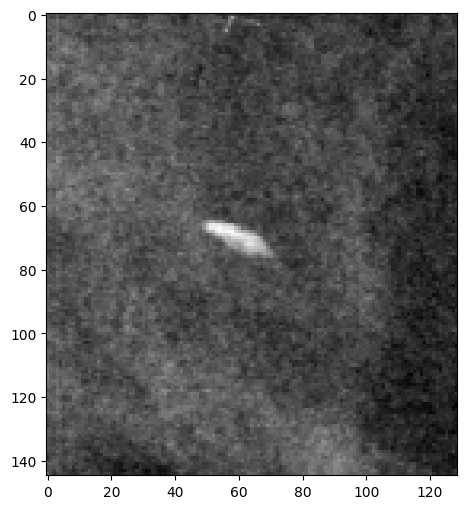

In [10]:
show_img(os.path.join(current_dir, '../data/subset/calc_train/'), 0)

In [11]:
# Function to get the pathology of the images
def match(file_path, dicom_df, subset_df):
    patient_row = dicom_df[dicom_df['SeriesInstanceUID'] == file_path]
    if not patient_row.empty:
        patient_id =  patient_row['PatientID'].values[0]
    else:
        return "No matching PatientID found for the given SeriesInstanceUID"
    matching_rows = subset_df[subset_df['cropped image file path'].str.contains(patient_id, na=False)]

    pathology_value = matching_rows['pathology'].values[0]
    return pathology_value

In [12]:
import matplotlib.image as mpimg

# Function that shows the images from one kind of dataset
def display_image_with_pathology(dir, n, df):
    subdirs = sorted(os.listdir(dir))
    subdir_path = os.path.join(dir, subdirs[n])
    image_files = sorted(os.listdir(subdir_path))
    first_image_path = os.path.join(subdir_path, image_files[0])

    pathology = match(subdirs[n], dicom_data, df)

    try:
        img = mpimg.imread(first_image_path)
        plt.imshow(img, cmap='gray')
        plt.title(f'Pathology: {pathology}')
        plt.axis('off')
        plt.show()
    except FileNotFoundError:
        print(f"Image {first_image_path} not found.")

Here are some examples of images from different datasets.

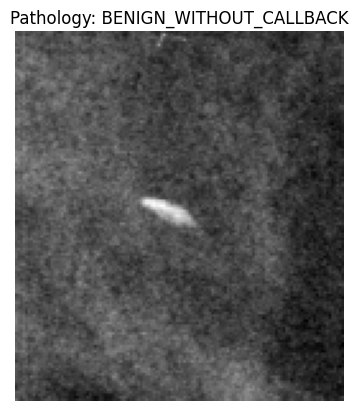

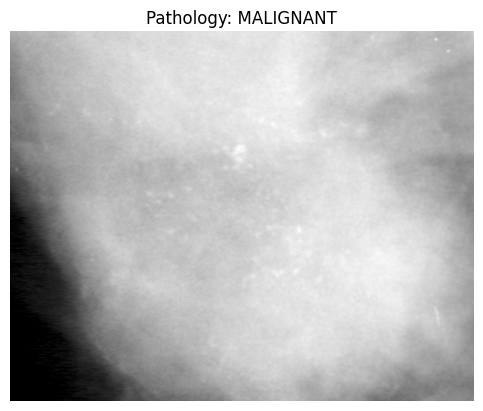

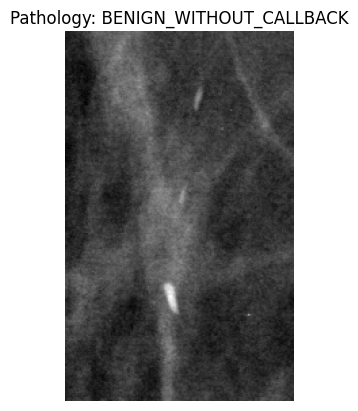

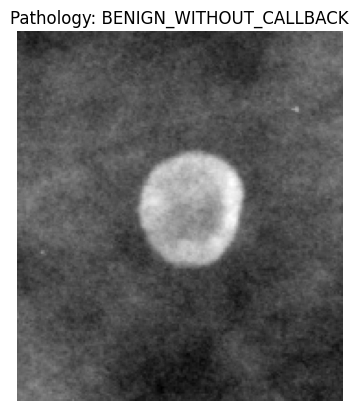

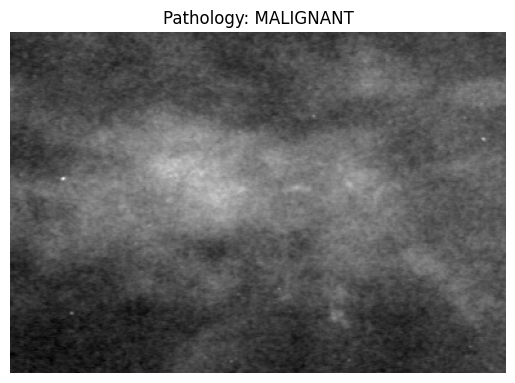

In [13]:
# Using the data_dir defined earlier
train_dir = os.path.join(data_dir, 'subset/calc_train/')

for i in range(5):
    display_image_with_pathology(train_dir, i, calc_train)


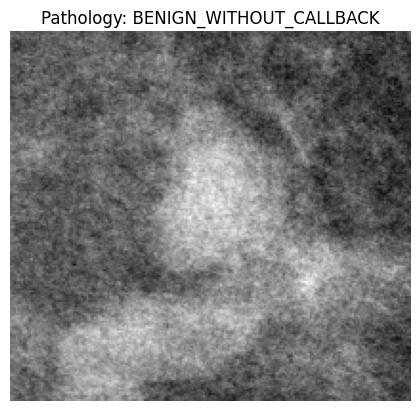

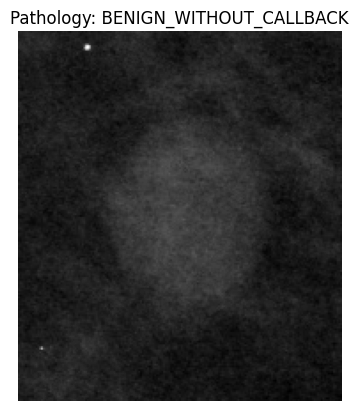

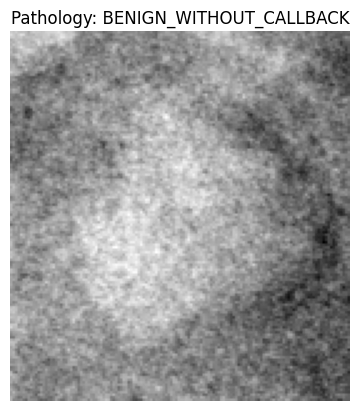

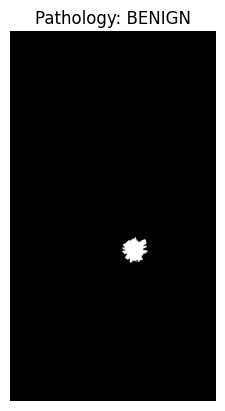

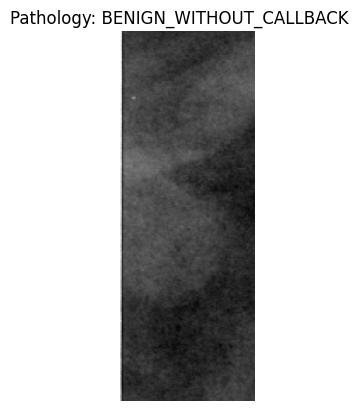

In [14]:
# Using data_dir defined earlier for mass_train
mass_train_dir = os.path.join(data_dir, 'subset/mass_train/')

for i in range(5):
    display_image_with_pathology(mass_train_dir, i, mass_train)

#### We found that the Calc_Case images does not have any obvious differences with Mass_Case images.
#### We will think about how to use three types of images to do the next step.